### **Importing Libraries**

In [28]:
import itertools
import math
import os
import numpy as np
import pandas as pd
import random

from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix as cnfm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.datasets import mnist




In [29]:
!pip install wandb



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import wandb

In [31]:
wandb.login(key='17d991db26320e751b170877037d1067a164fe6d')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [32]:
wandb.init(project="Assignment_1_finals1114")


# **Question 1**

In [33]:
(train_data, train_class), (test_data, test_class) = fashion_mnist.load_data()

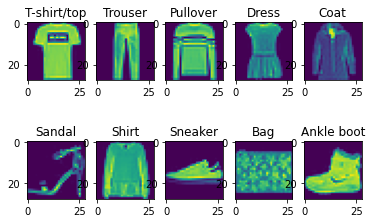

In [34]:
dress=["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]


unique=[]
outputs = 10
sizex = len(train_class)
for i in range(outputs):
  for j in range(sizex):
    res = train_class[j]
    if res==i:
      ans = train_data[j]
      unique.append(ans)
      break;

for i in range(len(unique)):
  plt.subplot(2,5,i+1)
  plt.imshow(unique[i])
  plt.title(dress[i])
wandb.run.name="Question-1"
wandb.log({"imagess":[wandb.Image(img,caption=item) for img,item in zip(unique,dress)]})
wandb.finish()

# **Question 2**

In [ ]:

train_data = np.array(train_data)
train_data = train_data / 255.0
test_data = np.array(test_data)
test_data = test_data / 255.0
print(train_data.shape)
print(test_data.shape)


In [35]:
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(train_data, train_class, test_size=split, random_state=42)
y_tr=y_train

y_train_unencoded = y_train
#One hot encoding of the class labels
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.expand_dims(y_train,1)).toarray()
y_val = encoder.fit_transform(np.expand_dims(y_val,1)).toarray()
y_test = encoder.fit_transform(np.expand_dims(test_class,1)).toarray()

In [36]:
class FeedForwardNeuralNetwork():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            res =  y_pred-truey
            return res
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def activation_function(self,name,x):
        res = np.tanh(x)
        return res
    def forward_propogation(self,activation,X):
        self.H={}
        self.H[0]=X.reshape(1,-1)
        self.A={}
        for i in range(self.hidden_sizes):
            wts = self.Weights[i+1]
            self.A[i+1]=np.matmul(self.H[i],wts)+self.Biases[i+1]
            self.H[i+1]=self.activation_function(activation,self.A[i+1])
        self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
        self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return 
    def fit(self,activation,X,Y):
        Y_pred=[]
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        
        for x,y in zip(X,Y):
            self.forward_propogation(activation,x)
            Y_pred.append(self.H[(self.hidden_sizes)+1][0])
        return Y_pred
        
        
    
    
    
    

In [41]:
xsize = x_train.shape[1]*x_train.shape[1]
ysize = y_train.shape[1]
hidden = [100,256,512]
model = FeedForwardNeuralNetwork(xsize,ysize,hidden)
activation_name = "tanh"
class_predictions = model.fit(activation_name, x_train, y_train)

np.set_printoptions(suppress=True)
print("The probability distribution for Image Index 455 is \n")
print(class_predictions[455])

The probability distribution for Image Index 455 is 

[0.00133078 0.00000083 0.         0.00145337 0.99504449 0.00000005
 0.00000002 0.00000691 0.00216356 0.        ]


array([0.00020793, 0.9325292 , 0.        , 0.00000005, 0.        ,
       0.        , 0.06726221, 0.        , 0.00000013, 0.00000048])

### **`Question 3-9`**

In [42]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [43]:
train_images, val_images, train_labels, val_labels  = train_test_split(train_images,train_labels,test_size=0.1,random_state = 42)

In [44]:
trainsize=train_images.shape[0]
traind = train_images.reshape(trainsize,-1)
mean = traind.mean(axis=0)
normalized = (traind -  mean)/np.max((traind -  mean).max(axis=0))

valsize=val_images.shape[0]
val_images = val_images.reshape(valsize,-1)
mean = val_images.mean(axis=0)
val_images =  (val_images -  mean)/np.max((val_images -  mean).max(axis=0))

testsize=test_images.shape[0]
test_images = test_images.reshape(testsize,-1)
max = (test_images -  mean).max(axis=0)
test_images = (test_images -  mean)/np.max((test_images -  mean).max(axis=0))

### **Starting Of NN**

In [49]:
class NeuralNet:
    def __init__(self,Size_of_Input, Number_of_Neuron_each_Layer, Number_of_Layers, activation_function, typeOfInit, L2reg_const = 0):
        self.activation_function = activation_function
        self.Size_of_Input = Size_of_Input
        self.Number_of_Layers = Number_of_Layers
        self.Number_of_Neuron_each_Layer = Number_of_Neuron_each_Layer
        self.L2reg_const = L2reg_const
        self.W,self.b = self.initializer(typeOfInit)

    
    def initializer(self, init):    
        b = []    
        W = []
        
        layers_size = self.Number_of_Layers
        if (init == 'xavier'):
            input_neuron = self.Number_of_Neuron_each_Layer[0]
            parameter =  input_neuron+ self.Size_of_Input
            input_size = self.Size_of_Input
            number_of_layers = layers_size
            W.append(np.random.normal(0,math.sqrt(2/(parameter)), ( input_neuron, input_size)))
            for i in range(1,layers_size):
                W.append(np.random.normal(0, math.sqrt(2/(self.Number_of_Neuron_each_Layer[i]+self.Number_of_Neuron_each_Layer[i-1])),(self.Number_of_Neuron_each_Layer[i],self.Number_of_Neuron_each_Layer[i-1])))

            for i in range(number_of_layers):
                curr_layer= self.Number_of_Neuron_each_Layer[i]
                b.append(np.random.rand(curr_layer))
        if init == 'random':
            input_neuron = self.Number_of_Neuron_each_Layer[0]
            input_size = self.Size_of_Input
            W.append(np.random.randn(input_neuron, input_size))
            number_of_layers = layers_size
            for i in range(1,number_of_layers):
                curr_layer = self.Number_of_Neuron_each_Layer[i]
                prev_layer = self.Number_of_Neuron_each_Layer[i-1]
                W.append(np.random.randn(curr_layer,prev_layer))

            for i in range( number_of_layers):
                curr_layer = self.Number_of_Neuron_each_Layer[i]
                b.append(np.random.rand(curr_layer))
        return W,b


    def activation(self, Z):
        if self.activation_function == 'ReLU':
            res = self.ReLU(Z)
            return res
        elif self.activation_function == 'tanh':
            res =  self.tanh(Z)
            return res
        elif self.activation_function == 'sigmoid':
            res = self.sigmoid(Z)
            return res


    def activation_derivative(self,Z):
        if self.activation_function == 'ReLU':
            res = self.ReLU_derivative(Z)
            return res
        if self.activation_function == 'tanh':
            res = self.tanh_derivative(Z)
            return res
        if self.activation_function == 'sigmoid':
            res = self.sigmoid_derivative(Z)
            return res
    def ReLU(self,Z):
        res= np.maximum(0,Z)
        return res

    def ReLU_derivative(self,Z):
        res = [1 if x>0 else 0 for x in Z]
        return res

    def tanh(self, Z):
        res = np.array([((np.exp(x) - np.exp(-x))/((np.exp(x) + np.exp(-x)))) for x in Z])
        return res
                 
    def tanh_derivative(self, Z):
        res = np.array(1 - self.tanh(Z)**2)
        return res
                 
    def sigmoid_derivative(self,Z):
        res = self.sigmoid(Z)*(1-self.sigmoid(Z))
        return res

    def sigmoid(self,x):
        res = np.where(x>=0, 1/(1+np.exp(-x)), np.exp(x)/(1+np.exp(x)))
        return res
    
    def softmax_function(self,Z):
            maxZ=Z.max()
            Z =   Z - maxZ# This is done to normalize the dataset
            prob =np.exp(Z)
            sumprob=np.sum(np.exp(Z),axis=0)
            return (prob/sumprob)

    def forward_propagation(self,Input):
        Input = np.array(Input)
        A = []
        H = []
        res = self.W[0].dot(Input) + self.b[0]
        A.append(res)
        number_of_layers =  self.Number_of_Layers
        for i in range(1, number_of_layers):
            H.append(self.activation(A[-1]))
            preactivation = self.W[i].dot(H[-1]) + self.b[i]
            A.append(preactivation)
        y_hat = self.softmax_function(A[-1])
        return A, H, y_hat

    def backward_propagation(self, A, H, y_hat, y, Input, loss_type):
        Input = np.array(Input)
        H.insert(0,Input)
        delW = []
        delb = []
        delA = []
        delH = []

        last_layer=self.Number_of_Neuron_each_Layer[-1]
        zeros= np.zeros(last_layer)
        ey = zeros
        ey[y] = 1
        
        if loss_type=="squared_error":
            der1=(y_hat - ey)
            der2=(y_hat - y_hat**2)
            delA.append(np.array(der1*der2))
        else:
        # delA and delH have reverse indexing
            res=-(ey - y_hat)
            delA.append(np.array(res))
        number_of_layers= self.Number_of_Layers
        for i in range( number_of_layers-1,-1,-1):
            delastAshape=delA[-1].shape[0]
            hlastshape=H[i].shape[0]
            regulariz=self.L2reg_const*self.W[i]
            delW.insert(0,delA[-1].reshape(delastAshape,1).dot(H[i].reshape(hlastshape,1).T) +regulariz )
            delb.insert(0,delA[-1])
            temp=self.W[i].T.dot(delA[-1])
            delH.append(temp)
            if i-1>=0:
                delA.append(np.multiply(delH[-1], self.activation_derivative(A[i-1])))
        return delW,delb
    
    
    def initialize(self, Size_of_Input,Number_of_Layers,Number_of_Neuron_each_Layer):
        W, b = [], []
        each_layer_neuron = Number_of_Neuron_each_Layer[0]
        input_size = Size_of_Input
        W.append(np.zeros(( Number_of_Neuron_each_Layer[0],input_size )))
        for i in range(1,Number_of_Layers):
            curr_layer = Number_of_Neuron_each_Layer[i]
            prev_layer = Number_of_Neuron_each_Layer[i-1]
            W.append(np.zeros((curr_layer,prev_layer)))
        for i in range(Number_of_Layers):
            curr_layer = Number_of_Neuron_each_Layer[i]
            b.append(np.zeros(curr_layer))            
        return W, b

    
    def optimize(self, X, Y, val_images,val_labels,optimizer, learning_rate, max_epochs,batch_size,loss_type,momentum=0.5,beta = 0.89, epsilon = 1e-6,beta1 = 0.89,beta2 = 0.989):
        if optimizer == 'sgd':
          self.stochastic_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,loss_type)
        if optimizer == 'momentum':
          self.momentum_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'nag':
          self.nesterov_accelerated_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'rmsprop':
          self.rmsprop(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'adam':
          self.adam(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'nadam':
          self.nadam(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)


    def stochastic_gradient_descent(self,X, Y, val_images,val_labels, learning_rate, max_epochs,loss_type):
        number_of_inputs = self.Size_of_Input
        layers_size = self.Number_of_Layers
        neurons = self.Number_of_Neuron_each_Layer
        for j in range(max_epochs):
            correct = 0
            error = 0
            delW, delb = self.initialize(number_of_inputs,layers_size,neurons)
            xsize=X.shape[0]
            for i in range(xsize):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW=self.W
                s = [x.sum() for x in upW]
                zeros=np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey = zeros
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else:
                      cross =-math.log(y_hat[Y[i]])
                      reg = self.L2reg_const/2*sum(s)
                      error += cross + reg

                delW,delb = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1
                
                for i in range(self.Number_of_Layers):
                    lrdelw = learning_rate*delW[i]
                    self.W[i] = self.W[i] - lrdelw
                    lrdelb = learning_rate*delb[i]
                    self.b[i] = self.b[i] - lrdelb

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    def momentum_gradient_descent(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,gamma = 0.6):
        number_of_input=self.Size_of_Input
        number_of_layers=self.Number_of_Layers
        neuron=self.Number_of_Neuron_each_Layer
        updateW, updateb = self.initialize(number_of_input,number_of_layers,neuron)

        for j in range(max_epochs):
            correct = 0
            error = 0

            delW, delb = self.initialize(number_of_input, number_of_layers,neuron)
            xsize=X.shape[0]
            
            for i in range(X.shape[0]):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW=self.W
                s = [x.sum() for x in upW]
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                     cross = -math.log(y_hat[Y[i]])
                     reg = self.L2reg_const/2*sum(s)
                     error += cross + reg
                
                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range( number_of_layers):
                    prevdelW = delW[k]
                    delW[k]  = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k]  = prevdelB + b[k]

                for k in range( number_of_layers):
                    gammaupW = gamma*updateW[k]
                    lrdelw = learning_rate*delW[k]
                    updateW[k] = gammaupW + learning_rate*delW[k]  

                    gammaupB = gamma*updateb[k]
                    lrdelb = learning_rate*delb[k]
                    updateb[k] = gammaupB + lrdelb
                temp=i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    delW, delb = self.initialize(number_of_input, number_of_layers,neuron)
                    for k in range( number_of_layers):
                        prevW1 = self.W[k] 
                        self.W[k] = prevW1 -updateW[k]
                        prevB1 = self.b[k]  
                        self.b[k] = prevB1 -updateb[k]
                res = np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1

                
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    def nesterov_accelerated_gradient_descent(self, X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type ,gamma = 0.5):
        number_of_input= self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        updateW, updateb = self.initialize( number_of_input, layers_size,neurons)
        lookaheadW, lookaheadb = self.initialize( number_of_input,  layers_size,neurons)
        thetaW, thetab = self.initialize( number_of_input, layers_size,neurons)

        for j in range(max_epochs):
            correct = 0
            error = 0

            delW, delb = self.initialize(number_of_input,layers_size,neurons)
                
            for k in range(layers_size):
                thetaW[k] = self.W[k]
                thetab[k] = self.b[k]

            for k in range(layers_size):
                gammaupW=gamma*updateW[k]
                lookaheadW[k] = thetaW[k] - gammaupW 
                gammaupB=gamma*updateb[k]
                lookaheadb[k] = thetab[k] - gammaupB
                self.W[k] = lookaheadW[k]
                self.b[k] = lookaheadb[k]

            xsize=X.shape[0]
            for i in range(xsize):
                A,H,y_hat = self.forward_propagation(X[i])
                Wup=self.W
                s = [x.sum() for x in Wup ]
               # cross=-math.log(y_hat[Y[i]])
               # regu= self.L2reg_const/2*sum(s)
                #error += cross + regu
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg
                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdW=delW[k]
                    delW[k] =prevdW + w[k]
                    prevdB=delb[k]
                    delb[k] =prevdB + b[k]

                for k in range( layers_size):
                    gammaW = gamma*updateW[k]
                    lrdelW= learning_rate*delW[k] 
                    updateW[k] =  gammaW + lrdelW

                    gammab =   gamma*updateb[k]
                    lrdelb=    learning_rate*delb[k]
                    updateb[k] = gammab +  lrdelb

                temp=i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    delW, delb = self.initialize(self.Size_of_Input,layers_size,self.Number_of_Neuron_each_Layer)
                    for k in range(layers_size):
                        befW = self.W[k]
                        self.W[k] = befW -updateW[k] 
                        befB = self.b[k]
                        self.b[k] =befB -updateb[k]
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1
            
           # error /= X.shape[0]
           # accuracy = correct/X.shape[0]*100
           # v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels)
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})



    def rmsprop(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type, beta = 0.89, epsilon = 1e-6):
        number_of_inputs=self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        v_W, v_b = self.initialize(number_of_inputs,layers_size,neurons)

        for j in range(max_epochs):
            error = 0
            correct = 0
            xsize=X.shape[0]

            delW, delb = self.initialize(number_of_inputs,layers_size,neurons)
    
            for i in range(xsize):
                val= X[i]
                A,H,y_hat = self.forward_propagation(val)
                Wup=self.W
                s = [x.sum() for x in Wup ]
                #cross= -math.log(y_hat[Y[i]])
               # reg= self.L2reg_const/2*sum(s)
                #error += cross  + reg
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdelW = delW[k]
                    delW[k]  = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k]  = prevdelB +  b[k]
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1

                for k in range(layers_size):
                    betavw1=beta*v_W[k]
                    betavw2=(1-beta)*delW[k]**2 
                    v_W[k] = betavw1  + betavw2 

                    betavb1=  beta*v_b[k]
                    betavb2=  (1-beta)*delb[k]**2 
                    v_b[k] = betavb1 + betavb2
         
                temp= i%batch_size
                if  (temp== 0 and i!=0) or i==xsize-1:
                    for k in range(layers_size):
                        betavw1= beta*v_W[k]
                        betavw2= (1-beta)*delW[k]**2  
                        v_W[k] =  betavw1 +  betavw2

                        betavb1=  beta*v_b[k]   
                        betavb2=  (1-beta)*delb[k]**2
                        v_b[k] = betavb1 + betavb2
                    for k in range(layers_size):
                        lrdelw=(learning_rate*delW[k])
                        sqrtvW=np.sqrt(v_W[k] + epsilon)
                        self.W[k] = self.W[k] - lrdelw/sqrtvW

                        lrdelb=(learning_rate*delb[k])
                        sqrtvB=np.sqrt(v_b[k] + epsilon)
                        self.b[k] = self.b[k] - lrdelb/sqrtvB
                    delW, delb = self.initialize(number_of_inputs,layers_size,neurons) 
            

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    
    def adam(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,beta1 = 0.89,beta2 = 0.989,epsilon = 1e-8):
        number_of_input = self.Size_of_Input
        number_of_layers= self.Number_of_Layers
        neurons= self.Number_of_Neuron_each_Layer
        m_W, m_b = self.initialize( number_of_input,number_of_layers,neurons)
        m_hat_W, m_hat_b = self.initialize(  number_of_input,number_of_layers,neurons)
        v_W, v_b = self.initialize( number_of_input,number_of_layers,neurons)
        v_hat_W, v_hat_b = self.initialize( number_of_input,number_of_layers,neurons)
        
        for j in range(0, max_epochs):
            correct = 0
            error = 0
            xsize = X.shape[0]
            delW, delb = self.initialize( number_of_input,number_of_layers,neurons)
            
            for i in range(xsize):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW = self.W
                s = [x.sum() for x in upW]
               # cross = -math.log(y_hat[Y[i]])
                #reg = self.L2reg_const/2*sum(s)
               # error += cross + reg
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg
               

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(number_of_layers):
                    prevdelW = delW[k]
                    delW[k] = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k] = prevdelB + b[k]
                res = np.argmax(y_hat) 
                if(res == Y[i]):
                    correct +=1
                temp = i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    for k in range(number_of_layers):
                        betavW1 =  beta2*v_W[k]
                        betavW2 = (1-beta2)*delW[k]*delW[k]
                        v_W[k] =   betavW1 + betavW2

                        betavB1 = beta2*v_b[k]
                        betavB2=  (1-beta2)*delb[k]*delb[k]
                        v_b[k] =  betavB1 + betavB2

                        betamW1 = beta1*m_W[k]
                        betadelw =  (1-beta1)*delW[k]
                        m_W[k] = betamW1 + betadelw

                        betamb1 = beta1*m_b[k]
                        betadelb= beta1*m_b[k]
                        m_b[k] = betamb1 + betadelb

                        powbeta1= (math.pow(beta1,j))
                        m_hat_W[k] = m_W[k]/ powbeta1
                        m_hat_b[k] = m_b[k]/powbeta1

                        powbeta2= (math.pow(beta2,j))
                        v_hat_W[k] = v_W[k]/powbeta2
                        v_hat_b[k] = v_b[k]/powbeta2
                    
                    for k in range(number_of_layers):
                        lrW = learning_rate*m_hat_W[k]
                        sqrtvW = np.sqrt(v_hat_W[k] + epsilon) 
                        self.W[k] = self.W[k] - (lrW)/sqrtvW

                        lrb = learning_rate*m_hat_b[k]
                        sqrtvb = np.sqrt(v_hat_b[k] + epsilon)
                        self.b[k] = self.b[k] - (lrb)/sqrtvb
                    delW, delb = self.initialize(number_of_input,number_of_layers,neurons)
                                
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})
    
    def nadam(self, X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,beta1 = 0.89,beta2 = 0.989,epsilon = 1e-8):
        number_of_inputs=self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        v_W, v_b = self.initialize(number_of_inputs,layers_size,neurons)
        v_hat_W, v_hat_b = self.initialize(number_of_inputs,layers_size,neurons)
        m_W, m_b = self.initialize(number_of_inputs,layers_size,neurons)
        m_hat_W, m_hat_b = self.initialize(number_of_inputs,layers_size,neurons)

        
        for j in range(1,max_epochs):
            error = 0
            correct = 0

            sizex=X.shape[0]
            delW, delb = self.initialize(self.Size_of_Input,self.Number_of_Layers,self.Number_of_Neuron_each_Layer)
            
            for i in range(sizex):
                A,H,y_hat = self.forward_propagation(X[i])
                
                s = [x.sum() for x in self.W]
              # # crosse=-math.log(y_hat[Y[i]])
                #regu=self.L2reg_const/2*sum(s)
               # error += crosse + regu
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdelW= delW[k]
                    delW[k] = prevdelW + w[k]
                    prevdelB= delb[k]
                    delb[k] = prevdelB+  b[k]
                res=np.argmax(y_hat) 
                if(res== Y[i]):
                    correct +=1
                temp=i%batch_size

                if  (temp == 0 and i!=0) or i==sizex-1:
                    for k in range(layers_size):
                        betavW1= beta2*v_W[k]
                        betavW2= (1-beta2)*delW[k]**2
                        v_W[k] =  betavW1 + betavW2

                        betavB1=beta2*v_b[k]
                        betavB2=(1-beta2)*delb[k]**2
                        v_b[k] = betavB1  + betavB2 
                        
                        betamW1=beta1*m_W[k]
                        betamW2=(1-beta1)*delW[k]
                        m_W[k] = betamW1 + betamW2

                        betamB1=beta1*m_b[k]
                        betamB2=(1-beta1)*delb[k]
                        m_b[k] = betamB1+ betamB2
                        
                        m_hat_bias= (math.pow(beta1,j))
                        m_hat_W[k] = m_W[k]/m_hat_bias
                        m_hat_b[k] = m_b[k]/m_hat_bias
                        
                        v_hat_bias = (math.pow(beta2,j))
                        v_hat_W[k] = v_W[k]/v_hat_bias
                        v_hat_b[k] = v_b[k]/v_hat_bias
                    for k in range(self.Number_of_Layers):
                        beta_mw=beta1*m_hat_W[k]
                        beta_dw=(1-beta1)*delW[k]/(1-beta1)
                        sqrt_dw=np.sqrt(v_hat_W[k] + epsilon)
                        self.W[k] = self.W[k] - (learning_rate*(beta_mw + beta_dw))/sqrt_dw

                        beta_mb=beta1*m_hat_b[k]
                        beta_db=(1-beta1)*delb[k]/(1-beta1)
                        sqrt_db=np.sqrt(v_hat_b[k] + epsilon)
                        self.b[k] = self.b[k] - (learning_rate*(beta_mb+beta_db))/sqrt_db
                    delW, delb = self.initialize(self.Size_of_Input,self.Number_of_Layers,self.Number_of_Neuron_each_Layer)
                    

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})
        
    
    def val_loss_and_accuracy(self,val_data,val_labels,loss_type):
        val_loss = []
        val_accuracy = []
        val_correct = 0
        val_error = 0

        for i in range(val_data.shape[0]):
            A,H,y_hat = self.forward_propagation(val_data[i]) 
            upW=self.W
            s = [x.sum() for x in upW]
            if loss_type == "squared_error":
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[val_labels[i]] = 1
                error=0.5*np.sum((ey-y_hat)**2)
                regerror= self.L2reg_const/2*sum(s)
                val_error += error + regerror
            else:
                 regu=self.L2reg_const/2*sum(s)
                 cross=-math.log(y_hat[val_labels[i]])
                 val_error += cross + regu
            maxi=np.argmax(y_hat)
            if  maxi == val_labels[i]:
                val_correct += 1
        m=val_data.shape[0]
        m1=val_data.shape[0]
        return val_error/m, val_correct/m1*100


    def test(self,test_data,test_labels):
        correct = 0
        y_hat = []
        testsize=test_data.shape[0]
        for i in range(testsize):

            A,H,y = self.forward_propagation(test_data[i])
            res=np.argmax(y)
            if res == test_labels[i]:
                correct += 1
            y_hat.append(y)
        a=np.argmax(np.array(y_hat),axis=1)
        b=correct/test_data.shape[0]*100
        return a,b

In [50]:
sweep_config = {
    'method': 'random',
    'metric': {'goal': 'maximize', 'name': 'valid_accuracy'},
    'parameters': {'activation_function': {'values': ['sigmoid', 'tanh', 'ReLU']},
                'batch_size': {'values': [16, 32, 64]},
                'epochs': {'values': [5,10]},
                'hidden_layer_size': {'values': [32,64,128]},
                'num_of_hidden_layers': { 'values' : [1,2] },
                'learning_rate': {'values': [0.0006,
                                             0.005,
                                             0.0001,
                                             0.0005,
                                             0.0003,
                                             0.01]},
                'optimizer': {'values': ['sgd',
                                         'momentum',
                                         'nag',
                                         'rmsprop',
                                         'adam',
                                         'nadam']},
                'weight_decay': {'values': [0, 0.0005,0.5]},
                'weight_initialization': {'values': ['random', 'xavier']},
                'loss_type': {'values': ['squared_error', 'cross_entropy']}}}

In [51]:
def train():
    var1 = wandb.init()
    var2 = var1.config
    nsize = normalized.shape[1]
    obj = NeuralNet(nsize, list(itertools.chain(*[[var2.hidden_layer_size]*var2.num_of_hidden_layers, [10]])), var2.num_of_hidden_layers+1, var2.activation_function, var2.weight_initialization, var2.weight_decay)
    obj.optimize(normalized, train_labels, val_images, val_labels, var2.optimizer, var2.learning_rate, var2.epochs, var2.batch_size, var2.loss_type)

In [53]:


sweep_id = wandb.sweep(sweep_config, project='Assignment_1_finals1111111')

Create sweep with ID: b4894dmx
Sweep URL: https://wandb.ai/harshvrma/Assignment_1_finals1111111/sweeps/b4894dmx


In [54]:
wandb.agent(sweep_id, train,count=5)

wandb: Agent Starting Run: erldbj0q with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 64
wandb: 	learning_rate: 0.005
wandb: 	loss_type: squared_error
wandb: 	num_of_hidden_layers: 1
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialization: xavier


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▇███▇██▇▇
train_loss,█▂▁▁▁▂▁▂▂▂
valid_accuracy,█▆▆▅▁▂▁▂▂▂
valid_loss,▁▃▁▃▆▆███▇
epoch,9
train_accuracy,84.99074
train_loss,0.11116
valid_accuracy,84.0
valid_loss,0.12027


wandb: Agent Starting Run: ve6m7lo0 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_of_hidden_layers: 1
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialization: xavier


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▂▂▁
valid_accuracy,▁▄▅▅▅▅▆█▇▇
valid_loss,█▅▃▃▅▁▃▃▅▂
epoch,9
train_accuracy,86.68333
train_loss,0.46077
valid_accuracy,85.25
valid_loss,0.50556


wandb: Agent Starting Run: cso4ejx9 with config:
wandb: 	activation_function: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 64
wandb: 	learning_rate: 0.0003
wandb: 	loss_type: squared_error
wandb: 	num_of_hidden_layers: 2
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_initialization: random


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▃█▂▁▁▁▁▁▁▁
train_loss,▁▅████████
valid_accuracy,▆█▁▁▁▁▁▁▁▁
valid_loss,▁▇████████
epoch,9
train_accuracy,10.01481
train_loss,0.42423
valid_accuracy,9.95
valid_loss,0.48769


wandb: Agent Starting Run: 6cj4vzsa with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 128
wandb: 	learning_rate: 0.005
wandb: 	loss_type: cross_entropy
wandb: 	num_of_hidden_layers: 1
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_initialization: xavier


epoch,▁▃▅▆█
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
valid_accuracy,▁▆▇▇█
valid_loss,█▃▁▁▁
epoch,4
train_accuracy,89.6037
train_loss,0.28977
valid_accuracy,87.85
valid_loss,0.3536


wandb: Agent Starting Run: 32qkni9b with config:
wandb: 	activation_function: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.0006
wandb: 	loss_type: squared_error
wandb: 	num_of_hidden_layers: 2
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_initialization: random


epoch,▁▂▃▄▅▅▆▇█
train_accuracy,█▁▂▂▂▁▂▁▁
train_loss,▁▄███████
valid_accuracy,█▁▄▃▃▃▃▃▃
valid_loss,▁▆███████
epoch,9
train_accuracy,9.71852
train_loss,0.44961
valid_accuracy,10.13333
valid_loss,0.44397


In [ ]:
var1 = wandb.init(project="Assignment_1_finals")
var2 = var1.config
xsize=784
output_size=10
Batch_size=16
hidden_layer=[32,32,10]
number_of_hidden_layer=3
obj = NeuralNet(xsize, hidden_layer, number_of_hidden_layer, 'ReLU', 'xavier', 0)
optimizer='nadam'
obj.optimize(normalized, train_labels, val_images, val_labels, optimizer, 0.0003,output_size, Batch_size,"cross_entropy")
y_pred, test_accuracy = obj.test(test_images, test_labels)
labels_all= [0,1,2,3,4,5,6,7,8,9]
cm = cnfm(y_pred, test_labels, labels = labels_all)  
value=False
wandb.sklearn.plot_confusion_matrix(test_labels, y_pred, labels_all)
wandb.log({'Confusion matrix': wandb.plots.HeatMap(labels_all, labels_all, cm, show_text=value), 'test_accuracy' : test_accuracy})

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


### **`Question 10`**

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images, val_images, train_labels, val_labels  = train_test_split(train_images,train_labels,test_size=0.1,random_state = 42)

In [ ]:
trainsize=train_images.shape[0]
traind = train_images.reshape(trainsize,-1)
mean = traind.mean(axis=0)
normalized = (traind -  mean)/np.max((traind -  mean).max(axis=0))

valsize=val_images.shape[0]
val_images = val_images.reshape(valsize,-1)
mean = val_images.mean(axis=0)
val_images =  (val_images -  mean)/np.max((val_images -  mean).max(axis=0))

testsize=test_images.shape[0]
test_images = test_images.reshape(testsize,-1)
max = (test_images -  mean).max(axis=0)
test_images = (test_images -  mean)/np.max((test_images -  mean).max(axis=0))

In [ ]:
class NeuralNet:
    def __init__(self,Size_of_Input, Number_of_Neuron_each_Layer, Number_of_Layers, activation_function, typeOfInit, L2reg_const = 0):
        self.activation_function = activation_function
        self.Size_of_Input = Size_of_Input
        self.Number_of_Layers = Number_of_Layers
        self.Number_of_Neuron_each_Layer = Number_of_Neuron_each_Layer
        self.L2reg_const = L2reg_const
        self.W,self.b = self.initializer(typeOfInit)

    
    def initializer(self, init):        
        W = []
        b = []
        if init == 'random':
            input_neuron = self.Number_of_Neuron_each_Layer[0]
            input_size = self.Size_of_Input
            W.append(np.random.randn(input_neuron, input_size))
            number_of_layers = self.Number_of_Layers
            for i in range(1,number_of_layers):
                curr_layer = self.Number_of_Neuron_each_Layer[i]
                prev_layer = self.Number_of_Neuron_each_Layer[i-1]
                W.append(np.random.randn(curr_layer,prev_layer))

            for i in range( number_of_layers):
                curr_layer = self.Number_of_Neuron_each_Layer[i]
                b.append(np.random.rand(curr_layer))
        if (init == 'xavier'):
            input_neuron = self.Number_of_Neuron_each_Layer[0]
            parameter =  input_neuron+ self.Size_of_Input
            input_size = self.Size_of_Input
            number_of_layers = self.Number_of_Layers
            W.append(np.random.normal(0,math.sqrt(2/(parameter)), ( input_neuron, input_size)))
            for i in range(1,self.Number_of_Layers):
                W.append(np.random.normal(0, math.sqrt(2/(self.Number_of_Neuron_each_Layer[i]+self.Number_of_Neuron_each_Layer[i-1])),(self.Number_of_Neuron_each_Layer[i],self.Number_of_Neuron_each_Layer[i-1])))

            for i in range(number_of_layers):
                curr_layer= self.Number_of_Neuron_each_Layer[i]
                b.append(np.random.rand(curr_layer))
        return W,b


    def activation(self, Z):
        if self.activation_function == 'ReLU':
            res = self.ReLU(Z)
            return res
        elif self.activation_function == 'tanh':
            res =  self.tanh(Z)
            return res
        elif self.activation_function == 'sigmoid':
            res = self.sigmoid(Z)
            return res


    def activation_derivative(self,Z):
        if self.activation_function == 'ReLU':
            res = self.ReLU_derivative(Z)
            return res
        if self.activation_function == 'tanh':
            res = self.tanh_derivative(Z)
            return res
        if self.activation_function == 'sigmoid':
            res = self.sigmoid_derivative(Z)
            return res
    def ReLU(self,Z):
        res= np.maximum(0,Z)
        return res

    def ReLU_derivative(self,Z):
        res = [1 if x>0 else 0 for x in Z]
        return res

    def tanh(self, Z):
        res = np.array([((np.exp(x) - np.exp(-x))/((np.exp(x) + np.exp(-x)))) for x in Z])
        return res
                 
    def tanh_derivative(self, Z):
        res = np.array(1 - self.tanh(Z)**2)
        return res
                 
    def sigmoid_derivative(self,Z):
        res = self.sigmoid(Z)*(1-self.sigmoid(Z))
        return res

    def sigmoid(self,x):
        res = np.where(x>=0, 1/(1+np.exp(-x)), np.exp(x)/(1+np.exp(x)))
        return res
    
    def softmax_function(self,Z):
            maxZ=Z.max()
            Z =   Z - maxZ# This is done to normalize the dataset
            prob =np.exp(Z)
            sumprob=np.sum(np.exp(Z),axis=0)
            return (prob/sumprob)

    def forward_propagation(self,Input):
        Input = np.array(Input)
        A = []
        H = []
        res = self.W[0].dot(Input) + self.b[0]
        A.append(res)
        number_of_layers =  self.Number_of_Layers
        for i in range(1, number_of_layers):
            H.append(self.activation(A[-1]))
            preactivation = self.W[i].dot(H[-1]) + self.b[i]
            A.append(preactivation)
        y_hat = self.softmax_function(A[-1])
        return A, H, y_hat

    def backward_propagation(self, A, H, y_hat, y, Input, loss_type):
        Input = np.array(Input)
        H.insert(0,Input)
        delW = []
        delb = []
        delA = []
        delH = []

        last_layer=self.Number_of_Neuron_each_Layer[-1]
        zeros= np.zeros(last_layer)
        ey = zeros
        ey[y] = 1
        
        if loss_type=="squared_error":
            der1=(y_hat - ey)
            der2=(y_hat - y_hat**2)
            delA.append(np.array(der1*der2))
        else:
        # delA and delH have reverse indexing
            res=-(ey - y_hat)
            delA.append(np.array(res))
        number_of_layers= self.Number_of_Layers
        for i in range( number_of_layers-1,-1,-1):
            delastAshape=delA[-1].shape[0]
            hlastshape=H[i].shape[0]
            regulariz=self.L2reg_const*self.W[i]
            delW.insert(0,delA[-1].reshape(delastAshape,1).dot(H[i].reshape(hlastshape,1).T) +regulariz )
            delb.insert(0,delA[-1])
            temp=self.W[i].T.dot(delA[-1])
            delH.append(temp)
            if i-1>=0:
                delA.append(np.multiply(delH[-1], self.activation_derivative(A[i-1])))
        return delW,delb
    
    
    def initialize(self, Size_of_Input,Number_of_Layers,Number_of_Neuron_each_Layer):
        W, b = [], []
        each_layer_neuron = Number_of_Neuron_each_Layer[0]
        input_size = Size_of_Input
        W.append(np.zeros(( Number_of_Neuron_each_Layer[0],input_size )))
        for i in range(1,Number_of_Layers):
            curr_layer = Number_of_Neuron_each_Layer[i]
            prev_layer = Number_of_Neuron_each_Layer[i-1]
            W.append(np.zeros((curr_layer,prev_layer)))
        for i in range(Number_of_Layers):
            curr_layer = Number_of_Neuron_each_Layer[i]
            b.append(np.zeros(curr_layer))            
        return W, b

    
    def optimize(self, X, Y, val_images,val_labels,optimizer, learning_rate, max_epochs,batch_size,loss_type):
        if optimizer == 'sgd':
          self.stochastic_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,loss_type)
        if optimizer == 'momentum':
          self.momentum_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'nag':
          self.nesterov_accelerated_gradient_descent(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'rmsprop':
          self.rmsprop(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'adam':
          self.adam(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)
        if optimizer == 'nadam':
          self.nadam(X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type)


    def stochastic_gradient_descent(self,X, Y, val_images,val_labels, learning_rate, max_epochs,loss_type):
        number_of_inputs = self.Size_of_Input
        layers_size = self.Number_of_Layers
        neurons = self.Number_of_Neuron_each_Layer
        for j in range(max_epochs):
            correct = 0
            error = 0
            delW, delb = self.initialize(number_of_inputs,layers_size,neurons)
            xsize=X.shape[0]
            for i in range(xsize):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW=self.W
                s = [x.sum() for x in upW]
                zeros=np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey = zeros
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else:
                      cross =-math.log(y_hat[Y[i]])
                      reg = self.L2reg_const/2*sum(s)
                      error += cross + reg

                delW,delb = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1
                
                for i in range(self.Number_of_Layers):
                    lrdelw = learning_rate*delW[i]
                    self.W[i] = self.W[i] - lrdelw
                    lrdelb = learning_rate*delb[i]
                    self.b[i] = self.b[i] - lrdelb

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    def momentum_gradient_descent(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,gamma = 0.6):
        number_of_input=self.Size_of_Input
        number_of_layers=self.Number_of_Layers
        neuron=self.Number_of_Neuron_each_Layer
        updateW, updateb = self.initialize(number_of_input,number_of_layers,neuron)

        for j in range(max_epochs):
            correct = 0
            error = 0

            delW, delb = self.initialize(number_of_input, number_of_layers,neuron)
            xsize=X.shape[0]
            
            for i in range(X.shape[0]):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW=self.W
                s = [x.sum() for x in upW]
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                     cross = -math.log(y_hat[Y[i]])
                     reg = self.L2reg_const/2*sum(s)
                     error += cross + reg
                
                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range( number_of_layers):
                    prevdelW = delW[k]
                    delW[k]  = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k]  = prevdelB + b[k]

                for k in range( number_of_layers):
                    gammaupW = gamma*updateW[k]
                    lrdelw = learning_rate*delW[k]
                    updateW[k] = gammaupW + learning_rate*delW[k]  

                    gammaupB = gamma*updateb[k]
                    lrdelb = learning_rate*delb[k]
                    updateb[k] = gammaupB + lrdelb
                temp=i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    delW, delb = self.initialize(number_of_input, number_of_layers,neuron)
                    for k in range( number_of_layers):
                        prevW1 = self.W[k] 
                        self.W[k] = prevW1 -updateW[k]
                        prevB1 = self.b[k]  
                        self.b[k] = prevB1 -updateb[k]
                res = np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1

                
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    def nesterov_accelerated_gradient_descent(self, X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type ,gamma = 0.5):
        number_of_input= self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        updateW, updateb = self.initialize( number_of_input, layers_size,neurons)
        lookaheadW, lookaheadb = self.initialize( number_of_input,  layers_size,neurons)
        thetaW, thetab = self.initialize( number_of_input, layers_size,neurons)

        for j in range(max_epochs):
            correct = 0
            error = 0

            delW, delb = self.initialize(number_of_input,layers_size,neurons)
                
            for k in range(layers_size):
                thetaW[k] = self.W[k]
                thetab[k] = self.b[k]

            for k in range(layers_size):
                gammaupW=gamma*updateW[k]
                lookaheadW[k] = thetaW[k] - gammaupW 
                gammaupB=gamma*updateb[k]
                lookaheadb[k] = thetab[k] - gammaupB
                self.W[k] = lookaheadW[k]
                self.b[k] = lookaheadb[k]

            xsize=X.shape[0]
            for i in range(xsize):
                A,H,y_hat = self.forward_propagation(X[i])
                Wup=self.W
                s = [x.sum() for x in Wup ]
               # cross=-math.log(y_hat[Y[i]])
               # regu= self.L2reg_const/2*sum(s)
                #error += cross + regu
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg
                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdW=delW[k]
                    delW[k] =prevdW + w[k]
                    prevdB=delb[k]
                    delb[k] =prevdB + b[k]

                for k in range( layers_size):
                    gammaW = gamma*updateW[k]
                    lrdelW= learning_rate*delW[k] 
                    updateW[k] =  gammaW + lrdelW

                    gammab =   gamma*updateb[k]
                    lrdelb=    learning_rate*delb[k]
                    updateb[k] = gammab +  lrdelb

                temp=i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    delW, delb = self.initialize(self.Size_of_Input,layers_size,self.Number_of_Neuron_each_Layer)
                    for k in range(layers_size):
                        befW = self.W[k]
                        self.W[k] = befW -updateW[k] 
                        befB = self.b[k]
                        self.b[k] =befB -updateb[k]
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1
            
           # error /= X.shape[0]
           # accuracy = correct/X.shape[0]*100
           # v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels)
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})



    def rmsprop(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size,loss_type, beta = 0.89, epsilon = 1e-6):
        number_of_inputs=self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        v_W, v_b = self.initialize(number_of_inputs,layers_size,neurons)

        for j in range(max_epochs):
            error = 0
            correct = 0
            xsize=X.shape[0]

            delW, delb = self.initialize(number_of_inputs,layers_size,neurons)
    
            for i in range(xsize):
                val= X[i]
                A,H,y_hat = self.forward_propagation(val)
                Wup=self.W
                s = [x.sum() for x in Wup ]
                #cross= -math.log(y_hat[Y[i]])
               # reg= self.L2reg_const/2*sum(s)
                #error += cross  + reg
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdelW = delW[k]
                    delW[k]  = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k]  = prevdelB +  b[k]
                res=np.argmax(y_hat)
                if(res == Y[i]):
                    correct +=1

                for k in range(layers_size):
                    betavw1=beta*v_W[k]
                    betavw2=(1-beta)*delW[k]**2 
                    v_W[k] = betavw1  + betavw2 

                    betavb1=  beta*v_b[k]
                    betavb2=  (1-beta)*delb[k]**2 
                    v_b[k] = betavb1 + betavb2
         
                temp= i%batch_size
                if  (temp== 0 and i!=0) or i==xsize-1:
                    for k in range(layers_size):
                        betavw1= beta*v_W[k]
                        betavw2= (1-beta)*delW[k]**2  
                        v_W[k] =  betavw1 +  betavw2

                        betavb1=  beta*v_b[k]   
                        betavb2=  (1-beta)*delb[k]**2
                        v_b[k] = betavb1 + betavb2
                    for k in range(layers_size):
                        lrdelw=(learning_rate*delW[k])
                        sqrtvW=np.sqrt(v_W[k] + epsilon)
                        self.W[k] = self.W[k] - lrdelw/sqrtvW

                        lrdelb=(learning_rate*delb[k])
                        sqrtvB=np.sqrt(v_b[k] + epsilon)
                        self.b[k] = self.b[k] - lrdelb/sqrtvB
                    delW, delb = self.initialize(number_of_inputs,layers_size,neurons) 
            

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})


    
    def adam(self,X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,beta1 = 0.89,beta2 = 0.989,epsilon = 1e-8):
        number_of_input = self.Size_of_Input
        number_of_layers= self.Number_of_Layers
        neurons= self.Number_of_Neuron_each_Layer
        m_W, m_b = self.initialize( number_of_input,number_of_layers,neurons)
        m_hat_W, m_hat_b = self.initialize(  number_of_input,number_of_layers,neurons)
        v_W, v_b = self.initialize( number_of_input,number_of_layers,neurons)
        v_hat_W, v_hat_b = self.initialize( number_of_input,number_of_layers,neurons)
        
        for j in range(0, max_epochs):
            correct = 0
            error = 0
            xsize = X.shape[0]
            delW, delb = self.initialize( number_of_input,number_of_layers,neurons)
            
            for i in range(xsize):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                upW = self.W
                s = [x.sum() for x in upW]
               # cross = -math.log(y_hat[Y[i]])
                #reg = self.L2reg_const/2*sum(s)
               # error += cross + reg
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg
               

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(number_of_layers):
                    prevdelW = delW[k]
                    delW[k] = prevdelW + w[k]
                    prevdelB = delb[k]
                    delb[k] = prevdelB + b[k]
                res = np.argmax(y_hat) 
                if(res == Y[i]):
                    correct +=1
                temp = i%batch_size
                if  (temp == 0 and i!=0) or i==xsize-1:
                    for k in range(number_of_layers):
                        betavW1 =  beta2*v_W[k]
                        betavW2 = (1-beta2)*delW[k]*delW[k]
                        v_W[k] =   betavW1 + betavW2

                        betavB1 = beta2*v_b[k]
                        betavB2=  (1-beta2)*delb[k]*delb[k]
                        v_b[k] =  betavB1 + betavB2

                        betamW1 = beta1*m_W[k]
                        betadelw =  (1-beta1)*delW[k]
                        m_W[k] = betamW1 + betadelw

                        betamb1 = beta1*m_b[k]
                        betadelb= beta1*m_b[k]
                        m_b[k] = betamb1 + betadelb

                        powbeta1= (math.pow(beta1,j))
                        m_hat_W[k] = m_W[k]/ powbeta1
                        m_hat_b[k] = m_b[k]/powbeta1

                        powbeta2= (math.pow(beta2,j))
                        v_hat_W[k] = v_W[k]/powbeta2
                        v_hat_b[k] = v_b[k]/powbeta2
                    
                    for k in range(number_of_layers):
                        lrW = learning_rate*m_hat_W[k]
                        sqrtvW = np.sqrt(v_hat_W[k] + epsilon) 
                        self.W[k] = self.W[k] - (lrW)/sqrtvW

                        lrb = learning_rate*m_hat_b[k]
                        sqrtvb = np.sqrt(v_hat_b[k] + epsilon)
                        self.b[k] = self.b[k] - (lrb)/sqrtvb
                    delW, delb = self.initialize(number_of_input,number_of_layers,neurons)
                                
            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})
    
    def nadam(self, X, Y, val_images,val_labels, learning_rate, max_epochs,batch_size, loss_type,beta1 = 0.89,beta2 = 0.989,epsilon = 1e-8):
        number_of_inputs=self.Size_of_Input
        layers_size=self.Number_of_Layers
        neurons=self.Number_of_Neuron_each_Layer
        v_W, v_b = self.initialize(number_of_inputs,layers_size,neurons)
        v_hat_W, v_hat_b = self.initialize(number_of_inputs,layers_size,neurons)
        m_W, m_b = self.initialize(number_of_inputs,layers_size,neurons)
        m_hat_W, m_hat_b = self.initialize(number_of_inputs,layers_size,neurons)

        
        for j in range(1,max_epochs):
            error = 0
            correct = 0

            sizex=X.shape[0]
            delW, delb = self.initialize(number_of_inputs,self.Number_of_Layers,neurons)
            
            for i in range(sizex):
                features=X[i]
                A,H,y_hat = self.forward_propagation(features)
                
                s = [x.sum() for x in self.W]
              # # crosse=-math.log(y_hat[Y[i]])
                #regu=self.L2reg_const/2*sum(s)
               # error += crosse + regu
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[Y[i]] = 1
                if loss_type == "squared_error":
                      sqrd = 0.5*np.sum((ey-y_hat)**2)
                      reg =  self.L2reg_const/2*sum(s)
                      error += sqrd + reg 
                else : 
                    cross = -math.log(y_hat[Y[i]])
                    reg = self.L2reg_const/2*sum(s)
                    error += cross + reg

                w,b = self.backward_propagation(A,H,y_hat,Y[i],X[i],loss_type)

                for k in range(layers_size):
                    prevdelW= delW[k]
                    delW[k] = prevdelW + w[k]
                    prevdelB= delb[k]
                    delb[k] = prevdelB+  b[k]
                res=np.argmax(y_hat) 
                if(res== Y[i]):
                    correct +=1
                temp=i%batch_size

                if  (temp == 0 and i!=0) or i==sizex-1:
                    for k in range(layers_size):
                        betavW1= beta2*v_W[k]
                        betavW2= (1-beta2)*delW[k]**2
                        v_W[k] =  betavW1 + betavW2

                        betavB1=beta2*v_b[k]
                        betavB2=(1-beta2)*delb[k]**2
                        v_b[k] = betavB1  + betavB2 
                        
                        betamW1=beta1*m_W[k]
                        betamW2=(1-beta1)*delW[k]
                        m_W[k] = betamW1 + betamW2

                        betamB1=beta1*m_b[k]
                        betamB2=(1-beta1)*delb[k]
                        m_b[k] = betamB1+ betamB2
                        
                        m_hat_bias= (math.pow(beta1,j))
                        m_hat_W[k] = m_W[k]/m_hat_bias
                        m_hat_b[k] = m_b[k]/m_hat_bias
                        
                        v_hat_bias = (math.pow(beta2,j))
                        v_hat_W[k] = v_W[k]/v_hat_bias
                        v_hat_b[k] = v_b[k]/v_hat_bias
                    for k in range(self.Number_of_Layers):
                        beta_mw=beta1*m_hat_W[k]
                        beta_dw=(1-beta1)*delW[k]/(1-beta1)
                        sqrt_dw=np.sqrt(v_hat_W[k] + epsilon)
                        self.W[k] = self.W[k] - (learning_rate*(beta_mw + beta_dw))/sqrt_dw

                        beta_mb=beta1*m_hat_b[k]
                        beta_db=(1-beta1)*delb[k]/(1-beta1)
                        sqrt_db=np.sqrt(v_hat_b[k] + epsilon)
                        self.b[k] = self.b[k] - (learning_rate*(beta_mb+beta_db))/sqrt_db
                    delW, delb = self.initialize(self.Size_of_Input,self.Number_of_Layers,self.Number_of_Neuron_each_Layer)
                    

            v_error, v_accruracy = self.val_loss_and_accuracy(val_images, val_labels,loss_type)
            sizex=X.shape[0]
            error =error/sizex
            sizexacc= X.shape[0]
            accuracy = correct/sizexacc*100
            wandb.log({'epoch' : j, 'train_loss' : error, 'train_accuracy' : accuracy,'valid_loss' : v_error,'valid_accuracy' : v_accruracy})
        
    
    def val_loss_and_accuracy(self,val_data,val_labels,loss_type):
        val_loss = []
        val_accuracy = []
        val_correct = 0
        val_error = 0

        for i in range(val_data.shape[0]):
            A,H,y_hat = self.forward_propagation(val_data[i]) 
            upW=self.W
            s = [x.sum() for x in upW]
            if loss_type == "squared_error":
                ey = np.zeros(self.Number_of_Neuron_each_Layer[-1])
                ey[val_labels[i]] = 1
                error=0.5*np.sum((ey-y_hat)**2)
                regerror= self.L2reg_const/2*sum(s)
                val_error += error + regerror
            else:
                 regu=self.L2reg_const/2*sum(s)
                 cross=-math.log(y_hat[val_labels[i]])
                 val_error += cross + regu
            maxi=np.argmax(y_hat)
            if  maxi == val_labels[i]:
                val_correct += 1
        m=val_data.shape[0]
        m1=val_data.shape[0]
        return val_error/m, val_correct/m1*100


    def test(self,test_data,test_labels):
        correct = 0
        y_hat = []
        testsize=test_data.shape[0]
        for i in range(testsize):

            A,H,y = self.forward_propagation(test_data[i])
            res=np.argmax(y)
            if res == test_labels[i]:
                correct += 1
            y_hat.append(y)
        a=np.argmax(np.array(y_hat),axis=1)
        b=correct/test_data.shape[0]*100
        return a,b

In [ ]:

xsize=784
output_size=10
Batch_size=16
hidden_layer=[32,16,10]
number_of_hidden_layer=3
obj = NeuralNet(xsize, hidden_layer, number_of_hidden_layer, 'ReLU', 'xavier', 0)
optimizer='nadam'
obj.optimize(normalized, train_labels, val_images, val_labels, optimizer, 0.0003,output_size, Batch_size,"cross_entropy")
y_pred, test_accuracy = obj.test(test_images, test_labels)
labels_all= [0,1,2,3,4,5,6,7,8,9]
cm = cnfm(y_pred, test_labels, labels = labels_all)  
value=False
print(test_accuracy)
#wandb.sklearn.plot_confusion_matrix(test_labels, y_pred, labels_all)
#wandb.log({'Confusion matrix': wandb.plots.HeatMap(labels_all, labels_all, cm, show_text=value), 'test_accuracy' : test_accuracy})

96.34


In [ ]:
xsize=784
output_size=10
Batch_size=16
hidden_layer=[128,128,10]
number_of_hidden_layer=3
obj = NeuralNet(xsize, hidden_layer, number_of_hidden_layer, 'ReLU', 'xavier', 0)
optimizer='sgd'
obj.optimize(normalized, train_labels, val_images, val_labels, optimizer, 0.01,output_size, Batch_size,"cross_entropy")
y_pred, test_accuracy = obj.test(test_images, test_labels)
labels_all= [0,1,2,3,4,5,6,7,8,9]
cm = cnfm(y_pred, test_labels, labels = labels_all)  
value=False
print(test_accuracy)

96.66


In [ ]:
xsize=784
output_size=10
Batch_size=16
hidden_layer=[128,128,10]
number_of_hidden_layer=3
obj = NeuralNet(xsize, hidden_layer, number_of_hidden_layer, 'ReLU', 'xavier', 0)
optimizer='rmsprop'
obj.optimize(normalized, train_labels, val_images, val_labels, optimizer, 0.01,output_size, Batch_size,"cross_entropy")
y_pred, test_accuracy = obj.test(test_images, test_labels)
labels_all= [0,1,2,3,4,5,6,7,8,9]
cm = cnfm(y_pred, test_labels, labels = labels_all)  
value=False
print(test_accuracy)

91.36999999999999
